In [2]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.1 from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
  Obtaining depend

In [3]:
pip install mutagen

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mutagen from https://files.pythonhosted.org/packages/b0/7a/620f945b96be1f6ee357d211d5bf74ab1b7fe72a9f1525aafbfe3aee6875/mutagen-1.47.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/194.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/194.4 kB ? eta -:--:--
   ------------------------- -------------- 122.9/194.4 kB 1.4 MB/s eta 0:00:01
   ------------------------------------- -- 184.3/194.4 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 194.4/194.4 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

Sample rate: 44100
Audio data: [-0.00109863 -0.00094604 -0.00167847 -0.00253296 -0.00305176 -0.00256348
 -0.00213623 -0.0027771  -0.00247192 -0.00161743]


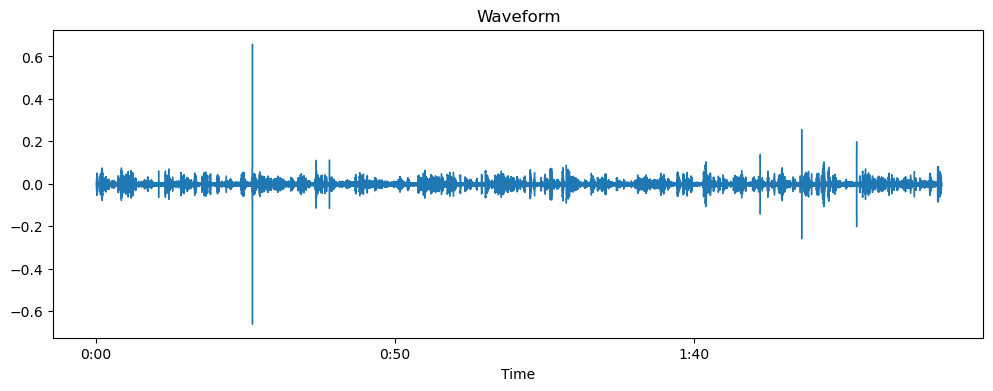

C:\Users\Nihal\AppData\Local\Temp\ipykernel_18140\1446254718.py:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


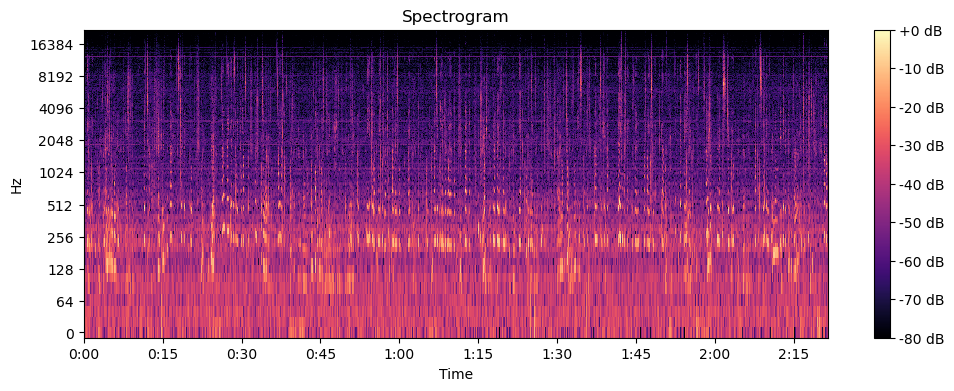

In [9]:
def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)  # Load the file with original sample rate
    
    print(f"Sample rate: {sr}")
    print(f"Audio data: {y[:10]}")  # Print first 10 samples for inspection

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(12, 4))
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Call the function with the path to your audio file
analyze_audio('F_0101_13y1m_1.wav')  # Replace with your file path


In [11]:
import os
from mutagen.wave import WAVE

def extract_metadata(file_path):
    try:
        audio = WAVE(file_path)
        # Accessing specific metadata attributes
        print(f"File Duration: {audio.info.length:.2f} seconds")
        print(f"Sample Rate: {audio.info.sample_rate} Hz")
        print(f"Channels: {audio.info.channels}")
        print(f"Bitrate: {audio.info.bitrate} bits per second")
    except Exception as e:
        print(f"Error extracting metadata: {e}")

# Call the function with the path to your audio file
extract_metadata('F_0101_13y1m_1.wav')


File Duration: 141.41 seconds
Sample Rate: 44100 Hz
Channels: 1
Bitrate: 705600 bits per second


In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#  Function to detect background noise inconsistencies
def detect_noise_mismatch(file_path, segment_duration=1.0):
    y, sr = librosa.load(file_path, sr=None)
    total_duration = len(y) / sr
    num_segments = int(np.floor(total_duration / segment_duration))
    
    noise_levels = []
    
    for i in range(num_segments):
        start = int(i * segment_duration * sr)
        end = int((i + 1) * segment_duration * sr)
        segment = y[start:end]
        # Measure the RMS (Root Mean Square) energy of the audio segment
        rms_energy = np.mean(librosa.feature.rms(y=segment))
        noise_levels.append(rms_energy)
    
    # Analyze the noise level changes
    noise_diff = np.diff(noise_levels)
    large_noise_jumps = np.where(np.abs(noise_diff) > np.mean(noise_diff) + 2 * np.std(noise_diff))[0]
    
    if large_noise_jumps.size > 0:
        print("Detected potential noise mismatches (background noise change):")
        for idx in large_noise_jumps:
            print(f"Sudden noise change between segment {idx} and {idx+1}")
    else:
        print("No significant noise mismatches detected.")
    
    return large_noise_jumps


file_path = 'F_0101_13y1m_1.wav'

print("\n Detecting Background Noise Mismatches")
noise_mismatches = detect_noise_mismatch(file_path)


 Detecting Background Noise Mismatches
Detected potential noise mismatches (background noise change):
Sudden noise change between segment 3 and 4
Sudden noise change between segment 23 and 24
Sudden noise change between segment 24 and 25
Sudden noise change between segment 25 and 26
Sudden noise change between segment 96 and 97
Sudden noise change between segment 100 and 101
Sudden noise change between segment 113 and 114
Sudden noise change between segment 114 and 115
Sudden noise change between segment 117 and 118
